# Project 4: Road Finding

by Alex, Lorn, and Ted

## Hypothesis

It is possible to extract road networks from satellite imagery with enough clarity to distinguish them from non-road features.

## Data

Images and rasterized road segments within them in tiles over the state of Massechusetts at 1m resolution. A 0.5m DEM of Massechusetts. A global building footprint dataset from Microsoft. 

### Initial Visuals


In [ ]:
from pathlib import Path
from itertools import islice

ROADS_DIR = Path("data/roads/")

for road_dir in ROADS_DIR.iterdir():
    if road_dir.is_dir():
        n = sum(1 for f in road_dir.iterdir() if f.is_file())
        print(road_dir.name, n)

train 1108
train_labels 1108
val 14
test_labels 49
test 49
val_labels 14


In [23]:
print("Image Files")
for item in islice(Path(ROADS_DIR / "train").iterdir(), 10):
    print(item.name)
print("\nLabel Files")
for item in islice(Path(ROADS_DIR / "train_labels").iterdir(), 10):
    print(item.name)

Image Files
17128945_15.tiff
26429275_15.tiff
22228930_15.tiff
20128900_15.tiff
22529395_15.tiff
20578900_15.tiff
24929230_15.tiff
11278945_15.tiff
27028705_15.tiff
24028810_15.tiff

Label Files
24478810_15.tif
11128855_15.tif
22679080_15.tif
11278660_15.tif
17128930_15.tif
24778825_15.tif
17578780_15.tif
15628855_15.tif
10528780_15.tif
17428945_15.tif


/home/lorn/Code/road-finding/.venv/lib/python3.11/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


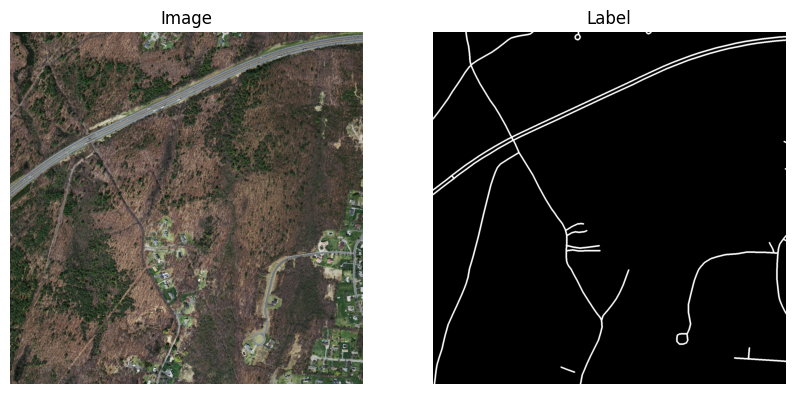

In [31]:
import rasterio
import matplotlib.pyplot as plt

img   = rasterio.open(ROADS_DIR/"test"/"10378780_15.tiff").read()
label = rasterio.open(ROADS_DIR/"test_labels"/"10378780_15.tif").read(1)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img.transpose(1,2,0))
plt.title("Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(label, cmap="gray")
plt.title("Label")
plt.axis("off")

plt.show()

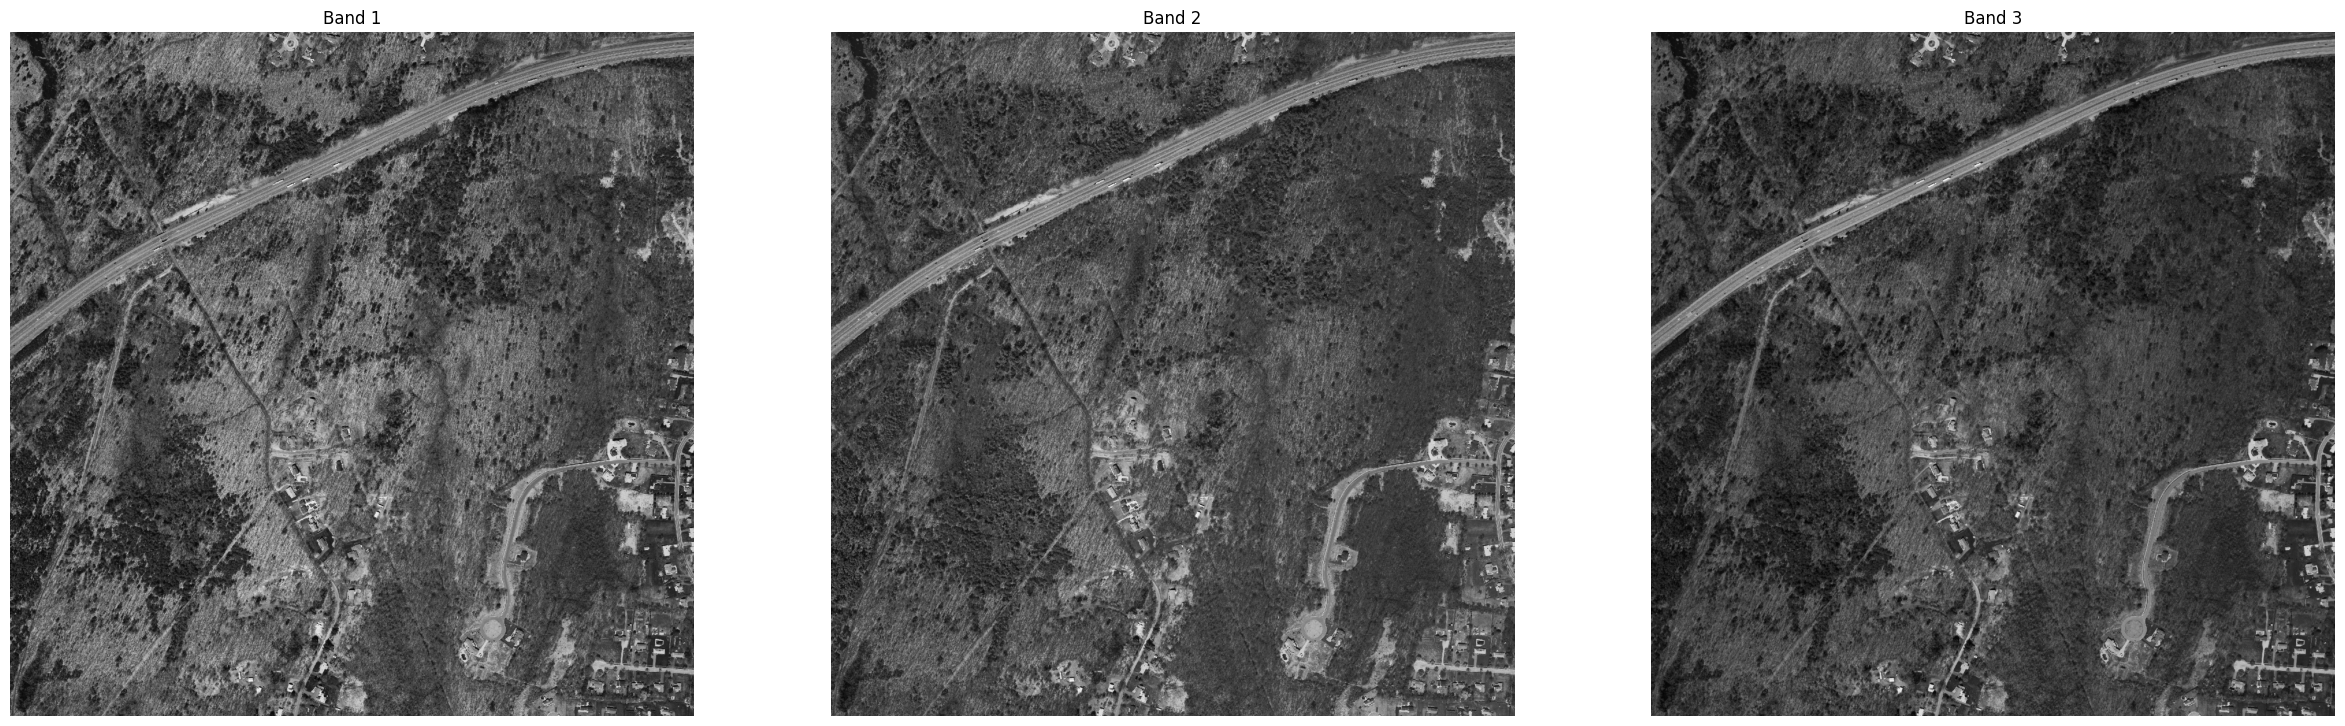

In [ ]:
path = ROADS_DIR/"test"/"10378780_15.tiff"

with rasterio.open(path) as src:
    img = src.read()   # shape: (bands, H, W)
    names = src.descriptions  # tuple of band names

bands, H, W = img.shape

plt.figure(figsize=(10 * bands, 10))

for i in range(bands):
    plt.subplot(1, bands, i+1)
    plt.imshow(img[i], cmap="gray")
    plt.title(f"Band {names[i]}")
    plt.axis("off")

plt.show()